In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
test_dir = './chest_xray/val'
test_imgs = ['./chest_xray/val/{}'.format(i) for i in os.listdir(test_dir)] #{}是必须要加的
nrows = 150
ncolumns = 150
channels = 1

In [3]:
def read_and_process_image(list_of_images):
    X = [ ]
    y = [ ]
    for image in list_of_images:
        '''img_array = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (nrows, ncolumns),interpolation = cv2.INTER_CUBIC )
        X.append(new_array)''' 
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_GRAYSCALE), (nrows, ncolumns)))
        if 'NORMAL' in image:
            y.append(1)
        elif 'PNEUMONIA' in image:
            y.append(0)
    #return X.reshape(-1, nrows, ncolumns, 1), y
    return X,y

In [4]:
X_test, y_test = read_and_process_image(test_imgs[1:5])
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
x = x.reshape(x.shape + (1, ))

In [6]:
model = tf.keras.models.load_model('64x3-CNN.model')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


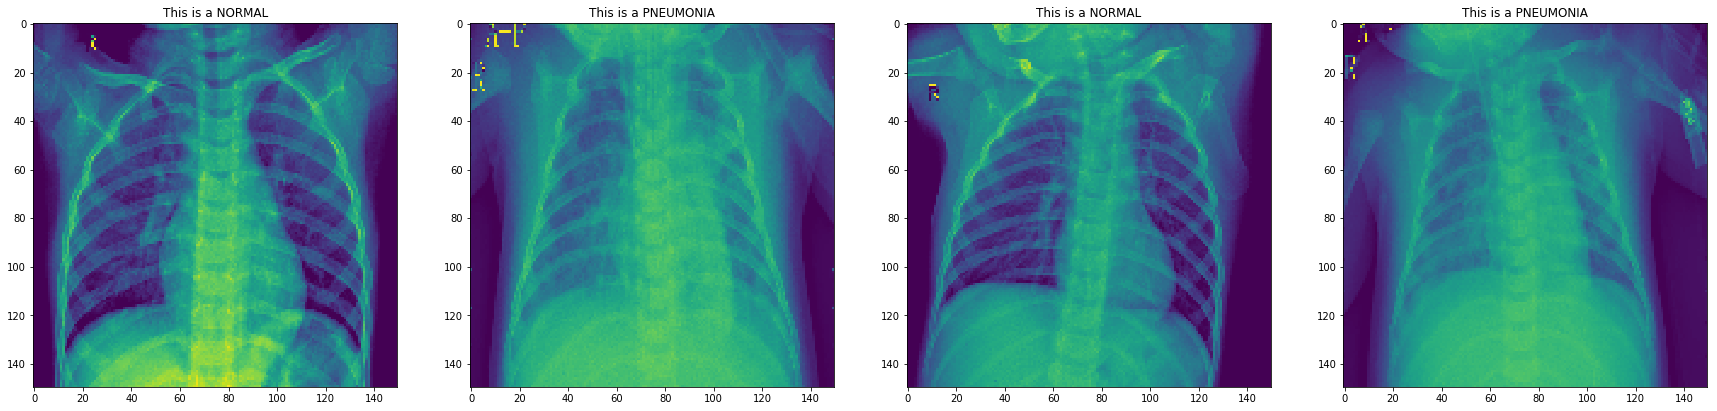

In [16]:
i = 0
text_labels = []
plt.figure(figsize=(30, 20))
columns = 4
for batch in test_datagen.flow(x, batch_size = 1):
    pred = model.predict(batch)
    if pred > 0.5:
        text_labels.append('PNEUMONIA')
    else:
        text_labels.append('NORMAL')
    plt.subplot(4 / columns + 1, columns, i + 1)
    plt.title('This is a ' + text_labels[i])
    
    image_temp = batch[0].reshape(150, 150)
    implot = plt.imshow(image_temp)
    i += 1
    if i % 4 == 0:
        break
plt.show()    